In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import japanize_matplotlib
%matplotlib inline

from scipy import stats

In [3]:
# ある飲料を毎日飲んでいる群、飲んでない群の、15~20歳の1年間の身長の伸び
target = [45, 14, 10, 35, 39, 41, 44, 34] # 飲んでいる群(mm)
control = [10, 11, 15, 3, 33, 15, 15, 25, 19, 35] # 飲んでない群(mm)

In [4]:
target_df = pd.DataFrame(target, columns=['delta(mm)'])
target_df["group"] = "target"
target_df.describe()

,delta(mm)
count,8.000000
mean,32.750000
std,13.413746
min,10.000000
25%,29.000000
50%,37.000000
75%,41.750000
max,45.000000


In [5]:
control_df = pd.DataFrame(control, columns=['delta(mm)'])
control_df["group"] = "control"
control_df.describe()

,delta(mm)
count,10.000000
mean,18.100000
std,10.159287
min,3.000000
25%,12.000000
50%,15.000000
75%,23.500000
max,35.000000


In [6]:
df = pd.concat([target_df, control_df])
df

,delta(mm),group
0,45,target
1,14,target
2,10,target
3,35,target
4,39,target
5,41,target
6,44,target
7,34,target
0,10,control
1,11,control


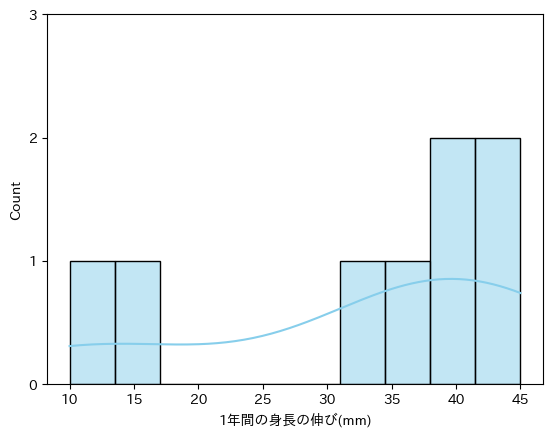

In [7]:
sns.histplot(x=df[df["group"] == "target"]["delta(mm)"], kde=True, bins=10, color="skyblue")
plt.xlabel("1年間の身長の伸び(mm)")
plt.yticks(np.arange(0, 4, 1))
plt.show()

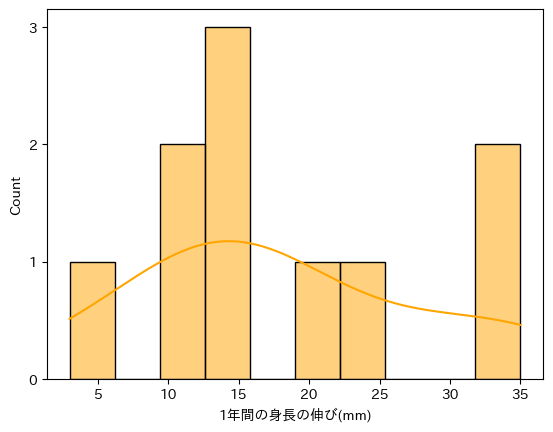

In [8]:
sns.histplot(x=df[df["group"] == "control"]["delta(mm)"], kde=True, bins=10, color="orange")
plt.xlabel("1年間の身長の伸び(mm)")
plt.yticks(np.arange(0, 4, 1))
plt.show()

![](./slides/img0006.png)

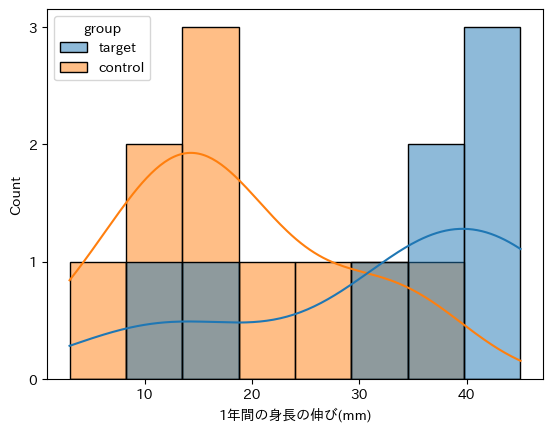

In [9]:
sns.histplot(data=df, x="delta(mm)", hue="group", kde=True, bins=8)
plt.xlabel("1年間の身長の伸び(mm)")
plt.yticks(np.arange(0, 4, 1))
plt.show()

In [9]:
stats.mannwhitneyu(target, control, alternative='two-sided')

MannwhitneyuResult(statistic=63.0, pvalue=0.0449207547628345)

In [10]:
# scipy.statsに含まれている、他の検定方法
help(stats)

Help on package scipy.stats in scipy:

NAME
    scipy.stats - .. _statsrefmanual:

DESCRIPTION
    Statistical functions (:mod:`scipy.stats`)
    
    .. currentmodule:: scipy.stats
    
    This module contains a large number of probability distributions,
    summary and frequency statistics, correlation functions and statistical
    tests, masked statistics, kernel density estimation, quasi-Monte Carlo
    functionality, and more.
    
    Statistics is a very large area, and there are topics that are out of scope
    for SciPy and are covered by other packages. Some of the most important ones
    are:
    
    - `statsmodels <https://www.statsmodels.org/stable/index.html>`__:
      regression, linear models, time series analysis, extensions to topics
      also covered by ``scipy.stats``.
    - `Pandas <https://pandas.pydata.org/>`__: tabular data, time series
      functionality, interfaces to other statistical languages.
    - `PyMC <https://docs.pymc.io/>`__: Bayesian statistical

## 多重比較の問題
- Control
- A群
- A + りんご
- A + ぶどう
- A + バナナ
<br>...

≒ サイコロを何度も振る<br>
→多重検定や検定後の補正が必要。